# Introdução a biblioteca Pandas

## Estrutura de dados

Pandas é um pacote Python que fornece estruturas de dados projetadas para facilitar o trabalho com dados estruturados (tabelas) e de séries temporais.

Como uma ferramenta de alto nível, pandas possui duas estruturas de dados que são as principais para a análise/manipulação de dados: a Series e o DataFrame. Uma Series é um como um vetor de dados (unidimencional), capaz de armazenar diferentes tipos de dados. Um DataFrame é conjunto de Series, ou como a documentação apresenta, um contêiner para Series. Ambas estruturas, possuem como grande característica, a indexação das linhas, ou seja, cada linha possui um rótulo (nome) que o identifica, o qual pode ser uma string, uma inteiro, um decimal ou uma data.

In [1]:
import pandas as pd

SERIES

Para construir um objeto do tipo Series, precisamos utilizar o método Series() do pacote pandas. O método possui o seguinte construtor: pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False). Veja que todos os parâmetros possuem valores padrões (default) o que permite instanciar um objeto de diferentes formas. Para endender cada parâmetro, a melhor fonte de informações é a documentação oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html.

In [2]:
pd.Series(data=5)

0    5
dtype: int64

In [3]:
lista_nomes = 'RYAN JUNIO LACERDA CALISTO DE OLIVEIRA'.split()
pd.Series(lista_nomes)

for index, i in enumerate(lista_nomes):
    dados = {
        'index': index, 'valor': i
    }

pd.Series(dados)


index           5
valor    OLIVEIRA
dtype: object

EXTRAINDO INFORMAÇÕES DE UMA SERIES

Já sabemos que estruturas de dados são utilizadas para armazenar dados e que, diferentes estruturas possuem diferentes atributos e métodos. Com as estruturas de dados do pandas não é diferente, tais objetos possuem atributos e métodos específicos, vamos conhecer alguns. Na entrada 7, criamos uma série contando números e um valor nulo (None). As informações extraídas das linhas 3 a 7, são mais com relação a "forma" dos dados, portanto poderiam ser usadas independente do tipo de dado armazenado na Series, inclusive em um cenário de dados com diferentes tipos. Já as informações das linhas 9 a 15, como se tratam de funções matemáticas e estatísticas, podem fazer mais sentido quando utilizadas para tipos numéricos. Verifique no comentário a frente de cada comando, o que ele faz. Vale a pena ressaltar a diferença entre o atributo shape e o método count(). O primeiro verifica quantas linhas a Series possui (quantos índices), já o segundo, conta quantos dados não nulos existem.

In [4]:
series_dados = pd.Series([10.2, -1, None, 15, 23.4])

print('Quantidade de linhas = ', series_dados.shape) # Retorna uma tupla com o número de linhas
print('Tipo de dados', series_dados.dtypes) # Retorna o tipo de dados, se for misto será object
print('Os valores são únicos?', series_dados.is_unique) # Verifica se os valores são únicos (sem duplicações)
print('Existem valores nulos?', series_dados.hasnans) # Verifica se existem valores nulos
print('Quantos valores existem?', series_dados.count()) # Conta quantas valores existem (excluí os nulos)

print('Qual o menor valor?', series_dados.min()) # Extrai o menor valor da Series (nesse caso os dados precisam ser do mesmo tipo)
print('Qual o maior valor?', series_dados.max()) # Extrai o valor máximo, com a mesma condição do mínimo
print('Qual a média aritmética?', series_dados.mean()) # Extrai a média aritmética de uma Series numérica
print('Qual o desvio padrão?', series_dados.std()) # Extrai o desvio padrão de uma Series numérica
print('Qual a mediana?', series_dados.median()) # Extrai a mediana de uma Series numérica

print('\nResumo:\n', series_dados.describe()) # Exibe um resumo sobre os dados na Series

Quantidade de linhas =  (5,)
Tipo de dados float64
Os valores são únicos? True
Existem valores nulos? True
Quantos valores existem? 4
Qual o menor valor? -1.0
Qual o maior valor? 23.4
Qual a média aritmética? 11.899999999999999
Qual o desvio padrão? 10.184301645179211
Qual a mediana? 12.6

Resumo:
 count     4.000000
mean     11.900000
std      10.184302
min      -1.000000
25%       7.400000
50%      12.600000
75%      17.100000
max      23.400000
dtype: float64


DATAFRAME

Para construir um objeto do tipo DataFrame, precisamos utilizar o método DataFrame() do pacote pandas. O método possui o seguinte construtor: pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False). Veja que todos os parâmetros possuem valores padrões (default) o que permite instanciar um objeto de diferentes formas. Para endender cada parâmetro, a melhor fonte de informações é a documentação oficial: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html.

Dentre todos os parâmetros esperados, somente um é obrigatório para se criar um DataFrame com dados, o parâmetro data=XXXX. Esse parâmetro pode receber, um objeto iterável, como uma lista, tupla, um dicionário ou um DataFrame, vejamos os exemplos.

In [5]:
lista_nomes = 'Howard Ian Peter Jonah Kellie'.split()
lista_cpfs = '111.111.111-11 222.222.222-22 333.333.333-33 444.444.444-44 555.555.555-55'.split()
lista_emails = 'risus.varius@dictumPhasellusin.ca Nunc@vulputate.ca fames.ac.turpis@cursusa.org non@felisullamcorper.org eget.dictum.placerat@necluctus.co.uk'.split()
lista_idades = [32, 22, 25, 29, 38]

pd.DataFrame(lista_nomes, columns=['nome'])
pd.DataFrame(lista_nomes, columns=['nome'], index=lista_cpfs)

,nome
111.111.111-11,Howard
222.222.222-22,Ian
333.333.333-33,Peter
444.444.444-44,Jonah
555.555.555-55,Kellie


In [6]:
dados = list(zip(lista_nomes, lista_cpfs, lista_idades, lista_emails)) # cria uma lista de tuplas

pd.DataFrame(dados, columns=['nome', 'cpfs', 'idade', 'email'])

,nome,cpfs,idade,email
0,Howard,111.111.111-11,32,risus.varius@dictumPhasellusin.ca
1,Ian,222.222.222-22,22,Nunc@vulputate.ca
2,Peter,333.333.333-33,25,fames.ac.turpis@cursusa.org
3,Jonah,444.444.444-44,29,non@felisullamcorper.org
4,Kellie,555.555.555-55,38,eget.dictum.placerat@necluctus.co.uk


ONSTRUTOR DATAFRAME COM DICIONÁRIO

DataFrames também podem ser construídos a partir de estruturas de dados do tipo dicionário. Cada chave será uma coluna e pode ter atribuída uma lista de valores. Obs: cada chave deve estar associada a uma lista de mesmo tamanho. Na entrada 12, criamos nosso dicionário de dados, veja que cada chave possui uma lista de mesmo tamanho e criamos nosso DataFrame, passando o dicionário como fonte de dados. Dessa forma o construtor já consegue identificar o nome das colunas.

In [7]:
dados = {
    'nomes': 'Howard Ian Peter Jonah Kellie'.split(),
    'cpfs' : '111.111.111-11 222.222.222-22 333.333.333-33 444.444.444-44 555.555.555-55'.split(),
    'emails' : 'risus.varius@dictumPhasellusin.ca Nunc@vulputate.ca fames.ac.turpis@cursusa.org non@felisullamcorper.org eget.dictum.placerat@necluctus.co.uk'.split(),
    'idades' : [32, 22, 25, 29, 38]
}

pd.DataFrame(dados)

,nomes,cpfs,emails,idades
0,Howard,111.111.111-11,risus.varius@dictumPhasellusin.ca,32
1,Ian,222.222.222-22,Nunc@vulputate.ca,22
2,Peter,333.333.333-33,fames.ac.turpis@cursusa.org,25
3,Jonah,444.444.444-44,non@felisullamcorper.org,29
4,Kellie,555.555.555-55,eget.dictum.placerat@necluctus.co.uk,38


EXTRAINDO INFORMAÇÕES DE UM DATAFRAME

Como já mencionamos, cada objeto possui seus próprios atributos e métodos, logo, embora Series e DataFrame tenham recursos em comum, eles também possuem suas particularidades. No DataFrame temos o método info() que mostra quantas linhas e colunas existem. Também exibe o tipo de cada coluna e quanto valores não nulos existem ali. Esse método também retorna uma informação sobre a quantidade de memória RAM essa estrutura está ocupando. Faça a leitura dos comentários e veja o que cada atributo e método retorna.

In [8]:
df_dados = pd.DataFrame(dados)

print('\nInformações do DataFrame:\n')
print(df_dados.info()) # Apresenta informações sobre a estrutura do DF

print('\nQuantidade de linhas e colunas = ', df_dados.shape) # Retorna uma tupla com o número de linhas e colunas
print('\nTipo de dados:\n', df_dados.dtypes) # Retorna o tipo de dados, para cada coluna, se for misto será object

print('\nQual o menor valor de cada coluna?\n', df_dados.min()) # Extrai o menor de cada coluna 
print('\nQual o maior valor?\n', df_dados.max()) # Extrai o valor máximo e cada coluna 
print('\nQual a média aritmética?\n', df_dados.mean()) # Extrai a média aritmética de cada coluna numérica
print('\nQual o desvio padrão?\n', df_dados.std()) # Extrai o desvio padrão de cada coluna numérica
print('\nQual a mediana?\n', df_dados.median()) # Extrai a mediana de cada coluna numérica

print('\nResumo:\n', df_dados.describe()) # Exibe um resumo

df_dados.head() # Exibe os 5 primeiros registros do DataFrame


Informações do DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nomes   5 non-null      object
 1   cpfs    5 non-null      object
 2   emails  5 non-null      object
 3   idades  5 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 288.0+ bytes
None

Quantidade de linhas e colunas =  (5, 4)

Tipo de dados:
 nomes     object
cpfs      object
emails    object
idades     int64
dtype: object

Qual o menor valor de cada coluna?
 nomes                Howard
cpfs         111.111.111-11
emails    Nunc@vulputate.ca
idades                   22
dtype: object

Qual o maior valor?
 nomes                                 Peter
cpfs                         555.555.555-55
emails    risus.varius@dictumPhasellusin.ca
idades                                   38
dtype: object

Qual a média aritmética?
 idades    29.2
dtype: float64

Qual o desvio padrão?


C:\Users\ryanj\AppData\Local\Temp\ipykernel_5404\3737244123.py:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('\nQual a média aritmética?\n', df_dados.mean()) # Extrai a média aritmética de cada coluna numérica
C:\Users\ryanj\AppData\Local\Temp\ipykernel_5404\3737244123.py:12: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print('\nQual o desvio padrão?\n', df_dados.std()) # Extrai o desvio padrão de cada coluna numérica
C:\Users\ryanj\AppData\Local\Temp\ipykernel_5404\3737244123.py:13: FutureWarning: The default value of n

,nomes,cpfs,emails,idades
0,Howard,111.111.111-11,risus.varius@dictumPhasellusin.ca,32
1,Ian,222.222.222-22,Nunc@vulputate.ca,22
2,Peter,333.333.333-33,fames.ac.turpis@cursusa.org,25
3,Jonah,444.444.444-44,non@felisullamcorper.org,29
4,Kellie,555.555.555-55,eget.dictum.placerat@necluctus.co.uk,38


SELEÇÃO DE COLUNAS EM UM DATAFRAME

Podemos realizar operações em colunas específicas de um DataFrame ou ainda criar um novo objeto contendo somente as colunas que serão usadas em uma determinada análise. Para selecionar uma coluna, as duas possíveis sintaxes são:

~~~~python
nome_df.nome_coluna
nome_df[nome_coluna]
~~~~

A primeira forma é familiar aos desenvolvedores que utilizar a linguagem SQL, porém ela não aceita colunas com espaços entre as palavras. Já a segunda aceita.Se precisarmos selecionar mais do que uma coluna, então precisamos passar uma lista, da seguinte forma: nome_df[['col1', 'col2', 'col3']], se preferir a lista pode ser criada fora da seção e passada como parâmetro.

Ao selecionar uma coluna, obtemos uma Series, consequentemente, podemos aplicar os atributos e métodos que aprendemos, por exemplo, para obter a média aritmética de uma determinada coluna. Observe os códigos a seguir. Na entrada 14, fizemos a seleção de uma única coluna "idades", veja na impressão que o tipo do objeto agora é uma Series. Na linha 4, a partir desse novo objeto, imprimimos a média de idade. Já na entrada 15, criamos uma lista com as colunas que queremos selecionar e na linha 2, passamos essa lista para seleção (df_dados[colunas]), consequentemente, obtivemos um novo DataFrame, mas agora com duas colunas.

Através da seleção de certas colunas podemos extrair informações específicas e até compará-las com outras colunas ou com outros dados. Esse recurso é muito utilizado por quem trabalha na área de dados.

In [9]:
df_uma_coluna = df_dados['idades']
print(type(df_uma_coluna))

print('Média de idades = ', df_uma_coluna.mean())

df_uma_coluna

<class 'pandas.core.series.Series'>
Média de idades =  29.2


0    32
1    22
2    25
3    29
4    38
Name: idades, dtype: int64

EXEMPLIFICANDO

Vamos utilizar tudo que já aprendemos e fazer uma atividade de raspagem web (web scraping). Vamos acessar a seguinte página de notícias do jornal New York Times: https://nyti.ms/3aHRu2D. A partir dessa fonte de informações vamos trabalhar para criar um DataFrame contendo o dia da notícia, o comentário que foi feito, a explicação que foi dada e o link da notícia.

Vamos começar nossa raspagem utilizando um recurso que já nos é familiar, a biblioteca requests! Fazer a extração da notícia com o requestes.get() convertendo tudo para uma única string, por isso vamos usar a propriedade text. Na linha 4, da entrada 16 imprimimos os 100 primeiros caracteres do texto que capturamos. Veja que foi lido o conteúdo HTML da página.

In [10]:
import requests
from bs4 import BeautifulSoup

texto_string = requests.get('https://www.nytimes.com/interactive/2017/06/23/opinion/trumps-lies.html').text
bsp_texto = BeautifulSoup(texto_string, 'html.parser')
lista_noticias = bsp_texto.find_all('span', attrs={'class': 'short-desc'})

print(type(bsp_texto))
print(type(lista_noticias))
print(lista_noticias[5])

lista_noticias[5].contents

<class 'bs4.BeautifulSoup'>
<class 'bs4.element.ResultSet'>
<span class="short-desc"><strong>Jan. 25 </strong>“You had millions of people that now aren't insured anymore.” <span class="short-truth"><a href="https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html" target="_blank">(The real number is less than 1 million, according to the Urban Institute.)</a></span></span>


[<strong>Jan. 25 </strong>,
 "“You had millions of people that now aren't insured anymore.” ",
 <span class="short-truth"><a href="https://www.nytimes.com/2017/03/13/us/politics/fact-check-trump-obamacare-health-care.html" target="_blank">(The real number is less than 1 million, according to the Urban Institute.)</a></span>]

In [11]:
dados = []

for noticia in lista_noticias:
    data = noticia.contents[0].text.strip() + ', 2017' # Dessa informação <strong>Jan. 25 </strong> vai extrair Jan. 25, 2017
    comentario = noticia.contents[1].strip().replace("“", '').replace("”", '')
    explicacao = noticia.contents[2].text.strip().replace("(", '').replace(")", '')
    url = noticia.find('a')['href']
    dados.append((data, comentario, explicacao, url))

dados[1]

('Jan. 21, 2017',
 'A reporter for Time magazine — and I have been on their cover 14 or 15 times. I think we have the all-time record in the history of Time magazine.',
 'Trump was on the cover 11 times and Nixon appeared 55 times.',
 'http://nation.time.com/2013/11/06/10-things-you-didnt-know-about-time/')

In [12]:
df_noticias = pd.DataFrame(dados, columns=['data', 'comentário', 'explicação', 'url'])

print(df_noticias.shape)
print(df_noticias.dtypes)
df_noticias.head()

(180, 4)
data          object
comentário    object
explicação    object
url           object
dtype: object


,data,comentário,explicação,url
0,"Jan. 21, 2017",I wasn't a fan of Iraq. I didn't want to go in...,He was for an invasion before he was against it.,https://www.buzzfeed.com/andrewkaczynski/in-20...
1,"Jan. 21, 2017",A reporter for Time magazine — and I have been...,Trump was on the cover 11 times and Nixon appe...,http://nation.time.com/2013/11/06/10-things-yo...
2,"Jan. 23, 2017",Between 3 million and 5 million illegal votes ...,There's no evidence of illegal voting.,https://www.nytimes.com/2017/01/23/us/politics...
3,"Jan. 25, 2017","Now, the audience was the biggest ever. But th...",Official aerial photos show Obama's 2009 inaug...,https://www.nytimes.com/2017/01/21/us/politics...
4,"Jan. 25, 2017",Take a look at the Pew reports (which show vot...,The report never mentioned voter fraud.,https://www.nytimes.com/2017/01/24/us/politics...


### Desafio

WEB SCRAPING

Técnica de extração de dados utilizada para coletar dados de sites através de tags HTML e atributos CSS.

Como desenvolvedor em uma empresa de consultoria de software, você foi alocado em uma equipe de marketing analítico em uma marca esportiva, que necessita fazer a coleta das principais notícias do mundo de esporte em um determinado portal. O cliente pedi para que o portal https://globoesporte.globo.com/. O cliente deseja um componente capaz de fazer a extração dos dados em forma tabular, com o seguintes campos: manchete, descrição, link, seção, hora da extração, tempo decorrido da publicação até a hora da extração. O Quadro 4.1 apresenta, visualmente, como os dados devem ser organizados e exibidos.

<img src="Capturar.png" />

O grande desafio no trabalho de web scraping é descobrir qual o padrão nas tags HTML e atributos CSS usados. Pois somente através deles é que conseguiremos alcançar a informação solicitada. Como o cliente já trabalha com o portal de notícias, foram lhe passadas as seguintes informações técnicas que o ajudarão a fazer a extração.

Para extração de todas as informações localize todas as div com atributo 'class':'feed-post-body'. De cada item localizado extraia:

* A manchete que ocupa a primeira posição do conteúdo.
* O link que pode ser localizado pela tag "a" e pelo atributo "href".
* A descrição pode estar na terceira posição conteúdo ou dentro de uma div com atributo 'class':'bstn-related'
* A seção está dentro de uma div com atributo 'class':'feed-post-metadata'. Localize o span com atributo 'class': 'feed-post-metadata-section'.
* O tempo decorrido está uma div com atributo 'class':'feed-post-metadata'. Localize o span com atributo 'class': 'feed-post-datetime'.

Caso tente acessar o texto de uma tag não localizada, um erro é dado, para evitar esses casos, os campos descrição, seção e time_delta devem ser tratados para esses casos, retornando None (nulo). Agora é com você, faça a implementação e gere um DataFrame com as informações solicitadas.

In [13]:
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [14]:
texto_string = requests.get('http://globoesporte.globo.com/').text
hora_extracao = datetime.now().strftime("%d-%m-%Y %H:%M:%S")

bsp_texto = BeautifulSoup(texto_string, 'html.parser')
lista_noticias = bsp_texto.find_all('div', attrs={'class': 'feed-post-body'})
print("Quantidade de noticias : ", len(lista_noticias))
lista_noticias[0].contents

Quantidade de noticias :  7


[<div class="feed-post-header with-post-chapeu"><span class="feed-post-header-chapeu">futebol</span></div>,
 <div class="feed-post-body-title gui-color-primary gui-color-hover"><div class="_evt"><h2><a class="feed-post-link gui-color-primary gui-color-hover" elementtiming="text-ssr" href="https://ge.globo.com/sp/tem-esporte/futebol/noticia/2023/03/22/nao-e-so-leila-presidente-poe-r-1-milhao-do-bolso-e-faz-ate-mercado-em-clube-da-ultima-divisao-de-sp.ghtml">Não é só Leila: presidente põe R$ 1 milhão do bolso e faz até mercado em clube paulista</a></h2></div></div>,
 <div class="feed-post-body-resumo" elementtiming="text-ssr">
 Acompanhamos o dia a dia da mulher que há mais tempo comanda um clube no Brasil</div>,
 <div class="feed-media-wrapper"><a class="feed-post-figure-link gui-image-hover" href="https://ge.globo.com/sp/tem-esporte/futebol/noticia/2023/03/22/nao-e-so-leila-presidente-poe-r-1-milhao-do-bolso-e-faz-ate-mercado-em-clube-da-ultima-divisao-de-sp.ghtml"><div class="bstn-fd-

extraindo a manchete

In [15]:
manchete = lista_noticias[0].contents[1].text.replace('"', "")
print(manchete)

Não é só Leila: presidente põe R$ 1 milhão do bolso e faz até mercado em clube paulista


extraindo o link

In [16]:
link = lista_noticias[0].find('a').get('href')
print(link)

https://ge.globo.com/sp/tem-esporte/futebol/noticia/2023/03/22/nao-e-so-leila-presidente-poe-r-1-milhao-do-bolso-e-faz-ate-mercado-em-clube-da-ultima-divisao-de-sp.ghtml


In [17]:
descricao = lista_noticias[0].contents[2].text
if not descricao:
    descricao = noticia.find('div', attrs={'class', 'bstn-related'})
    descricao = descricao.text if descricao else None #somente ira acessar a propriedade text se encontrar a descricao

print(descricao)


Acompanhamos o dia a dia da mulher que há mais tempo comanda um clube no Brasil


In [18]:
metadados = lista_noticias[0].find('div', attrs={'class', 'feed-post-metadata'})
print(metadados)

<div class="feed-post-metadata"><span class="feed-post-datetime">Há 5 horas</span><span class="feed-post-metadata-section"> futebol </span></div>


In [19]:
secao = metadados.find('span', attrs={'class', 'feed-post-metadata-section'})
time_delta = metadados.find('span', attrs={'class', 'feed-post-datetime'})

time_delta = time_delta.text if time_delta else None
secao = secao.text if secao else None

print(time_delta)
print(secao)

Há 5 horas
 futebol 


criando o dataframe

In [20]:
dados = []
for noticia in lista_noticias:
    manchete = noticia.contents[1].text.replace('"', "")
    link = noticia.find('a').get('href')

    descricao = noticia.contents[2].text
    if not descricao:
        descricao = noticia.find('div', attrs={'class': 'bstn-related'})
        descricao = descricao.text if descricao else None

    metadados = noticia.find('div', attrs={'class': 'feed-post-metadata'})
    time_delta = metadados.find('span', attrs={'class': 'feed-post-datetime'})
    secao = metadados.find(
        'span', attrs={'class': 'feed-post-metadata-section'})

    time_delta = time_delta.text if time_delta else None
    secao = secao.text if secao else None

    dados.append((manchete, descricao, link, secao, hora_extracao, time_delta))

df = pd.DataFrame(dados, columns=[
                  'manchete', 'descrição', 'link', 'seção', 'hora_extração', 'time_delta'])
df.head()


,manchete,descrição,link,seção,hora_extração,time_delta
0,Não é só Leila: presidente põe R$ 1 milhão do ...,\nAcompanhamos o dia a dia da mulher que há ma...,https://ge.globo.com/sp/tem-esporte/futebol/no...,futebol,22-03-2023 16:23:38,Há 5 horas
1,"Palmeiras busca última cartada por Artur, do B...",Verdão tenta primeiro título paulista invicto ...,https://ge.globo.com/futebol/times/palmeiras/n...,palmeiras,22-03-2023 16:23:38,Há 19 minutos
2,📺 Assista aos nossos principais vídeos,None,https://ge.globo.com/playlist/assista-aos-noss...,globoesporte,22-03-2023 16:23:38,Há 22 horas
3,CBF emite relatório sobre suposta manipulação ...,Brasil é o país com mais jogos suspeitos no mu...,https://ge.globo.com/ac/futebol/noticia/2023/0...,futebol,22-03-2023 16:23:38,Há 1 hora
4,"Com Gerson e Gabigol no topo, Flamengo é time ...",Corinthians e São Paulo são os mais disciplina...,https://ge.globo.com/espiao-estatistico/notici...,espião estatístico,22-03-2023 16:23:38,Há 4 horas


## INTRODUÇÃO A MANIPULAÇÃO DE DADOS EM PANDAS

### MÉTODOS PARA MANIPULAÇÃO DE DADOS

Além dos métodos para carregar e salvar dados, a biblioteca pandas possui também métodos para a transformação dos dados e a extração de informação.

MÉTODOS PARA LEITURA E ESCRITA DA BIBLIOTECA PANDAS

A biblioteca pandas foi desenvolvida para trabalhar com dados estruturados, ou seja, dados dispostos em linhas e colunas. Os dados podem estar gravados em arquivos, em páginas web, em APIs, em outros softwares, em object stores (sistemas de armazenamento em cloud) ou em bancos de dados. Para todas essas origens (e até mais), a biblioteca possui métodos capazes de fazer a leitura dos dados e carregar em um DataFrame.

Todos os métodos capazes de fazer a leitura dos dados estruturados possuem prefixo pd.read_XXX, onde pd é o apelido dado no momento da importação da biblioteca e XXX é o restante da sintaxe do método. Além de fazer a leitura a biblioteca possui diversos métodos capazes de escrever o DataFrame em um arquivo, em um banco ou ainda simplesmente copiar para a área de transferência do sistema operacional.

<img src="Capturar2.png"/>

LEITURA DE JSON E CSV COM PANDAS

In [21]:
import pandas as pd
pd.read_json("https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json").head()

,data,valor
0,04/06/1986,0.065041
1,05/06/1986,0.067397
2,06/06/1986,0.066740
3,09/06/1986,0.068247
4,10/06/1986,0.067041


In [22]:
pd.read_csv("https://people.sc.fsu.edu/~jburkardt/data/csv/cities.csv").head()

,LatD,"""LatM""","""LatS""","""NS""","""LonD""","""LonM""","""LonS""","""EW""","""City""","""State"""
0,41,5,59,"""N""",80,39,0,"""W""","""Youngstown""",OH
1,42,52,48,"""N""",97,23,23,"""W""","""Yankton""",SD
2,46,35,59,"""N""",120,30,36,"""W""","""Yakima""",WA
3,42,16,12,"""N""",71,48,0,"""W""","""Worcester""",MA
4,43,37,48,"""N""",89,46,11,"""W""","""Wisconsin Dells""",WI


MANIPULAÇÃO DE DADOS COM PANDAS

Além de vários métodos para carregar e salvar os dados, a biblioteca pandas possui uma diversidade de métodos para a transformação dos dados e a extração de informação para áreas de negócio. Nessa seção vamos conhecer alguns deles.

O trabalho com dados: capturar os dados em suas origens, fazer transformações nos dados a fim de padronizá-los, aplicar técnicas estatísticas clássicas ou algoritmos de machine/deep learning feito por engenheiros e cientistas de dados. Cada profissional atuando em uma parte específica, dependendo da organização da empresa. Em todo esse trabalho é comum fazer a divisão em duas etapas: (i) captura e transformação/padronização dos dados, (ii) extração de informações.

ETAPA DE CAPTURA E TRANSFORMAÇÃO/ PADRONIZAÇÃO DOS DADOS

A extração dos dados pode ser realizada por meio do método read_json() e guardando em um DataFrame (DF) pandas. Ao carregar os dados em um DF, podemos visualizar quantas linhas e colunas, bem como, os tipos de dados em cada coluna, com o método info(). Observe a entrada 4 e a saída do código a seguir, o método retorna que o DF possui 8552 registros (entradas) e 2 colunas (A quantidade de linhas certamente será diferente quando executar esse código). Os índices são numéricos e variam de 0 a 8551 (N-1). Outras duas informações relevantes que esse método retorna é sobre a quantidade de células sem valor (non-null) e o tipo dos dados nas colunas. Como podemos ver, ambas colunas possuem 8552 valores não nulos, como esse número é igual a quantidade de linhas, então não existem valores faltantes. Quanto ao tipo de dados, o "data" é um object, ou seja, são todos do tipo strings ou existe mistura de tipos; "valor" é um float.

In [23]:
df_selic = pd.read_json("https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=json")
print(df_selic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9224 entries, 0 to 9223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    9224 non-null   object 
 1   valor   9224 non-null   float64
dtypes: float64(1), object(1)
memory usage: 144.2+ KB
None


REMOVER LINHAS DUPLICADAS

Para o carregamento de uma base de dados, um dos primeiros tratamentos que devemos fazer é remover os dados duplicados. Certamente, qual registro remover depende da área de negócio e do problema a ser resolvido. Por exemplo, queremos manter o registro da compra atual, ou queremos manter a primeira compra. Um DataFrame da bilioteca pandas possui o método meu_df.drop_duplicates() que permite fazer essa remoção de dados duplicados.

In [24]:
df_selic.drop_duplicates(keep='last', inplace=True)

CRIAR NOVAS COLUNAS

A segunda transformação que veremos é como criar uma nova coluna. A sintaxe é similar a criar uma nova chave em um dicionário: meu_df['nova_coluna'] = dado. Vamos criar uma coluna que adiciona a data de extração das informações. Observe a seguir, do módulo datetime, estamos usando a classe date e o método today(). Na entrada 6, guardamos a data em uma nova coluna, veja que a biblioteca pandas "entende" que esse valor deve ser colocado em todas as linhas. Na linha 7, estamos criando uma nova coluna com o nome do responsável pela extração, veja que basta atribuir a string a uma nova coluna. Temos ainda um problema com o tipo de dados das datas, embora cada valor seja do tipo "date", veja que pelo info() ainda obtemos uma coluna object, para que de fato, a biblioteca interprete como um tipo data, vamos ter que utilizar o método da própria biblioteca para fazer a conversão.

In [25]:
from datetime import date
from datetime import datetime as dt

data_extracao = date.today()

df_selic['data_extracao'] = data_extracao
df_selic['responsavel'] = "Autor(a)"

print(df_selic.info())
df_selic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9224 entries, 0 to 9223
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   data           9224 non-null   object 
 1   valor          9224 non-null   float64
 2   data_extracao  9224 non-null   object 
 3   responsavel    9224 non-null   object 
dtypes: float64(1), object(3)
memory usage: 360.3+ KB
None


,data,valor,data_extracao,responsavel
0,04/06/1986,0.065041,2023-03-22,Autor(a)
1,05/06/1986,0.067397,2023-03-22,Autor(a)
2,06/06/1986,0.066740,2023-03-22,Autor(a)
3,09/06/1986,0.068247,2023-03-22,Autor(a)
4,10/06/1986,0.067041,2023-03-22,Autor(a)


MÉTODO TO_DATETIME() E ASTYPE()

Trabalhar com o tipo "data" pode trazer vantagens, como por exemplo, ordenar da data mais recente para mais antiga, ou ainda verificar a variação da taxa selic em um determinado período. Vamos utilizar os métodos pandas.to_datime() e minha_series.astype() para fazer a conversão e transformar as colunas data e data_extracao. Observe o código a seguir, onde realizamos a transformação e guardamos dentro da própria coluna, dessa forma os valores são sobrescritos. Na linha 1, usamos a notação pd.to_datetime(), porque é um método da biblioteca e não do DF.

In [26]:
df_selic['data'] = pd.to_datetime(df_selic['data'], dayfirst=True)
df_selic['data_extracao'] = df_selic['data_extracao'].astype('datetime64[ns]')

print(df_selic.info())
df_selic.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9224 entries, 0 to 9223
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   data           9224 non-null   datetime64[ns]
 1   valor          9224 non-null   float64       
 2   data_extracao  9224 non-null   datetime64[ns]
 3   responsavel    9224 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(1)
memory usage: 360.3+ KB
None


,data,valor,data_extracao,responsavel
0,1986-06-04,0.065041,2023-03-22,Autor(a)
1,1986-06-05,0.067397,2023-03-22,Autor(a)
2,1986-06-06,0.066740,2023-03-22,Autor(a)
3,1986-06-09,0.068247,2023-03-22,Autor(a)
4,1986-06-10,0.067041,2023-03-22,Autor(a)


In [27]:
df_selic['responsavel'] = df_selic['responsavel'].str.upper()
df_selic.head()

,data,valor,data_extracao,responsavel
0,1986-06-04,0.065041,2023-03-22,AUTOR(A)
1,1986-06-05,0.067397,2023-03-22,AUTOR(A)
2,1986-06-06,0.066740,2023-03-22,AUTOR(A)
3,1986-06-09,0.068247,2023-03-22,AUTOR(A)
4,1986-06-10,0.067041,2023-03-22,AUTOR(A)


MÉTODO SORT_VALUES()

No código a seguir, estamos usando o método sort_values() que permite ordenar o DF, de acordo com os valores de uma coluna. Esse método é do DataFrame, por isso a notação meu_df.metodo(). Utilizamos três parâmetros do método sort_values, o primeiro informando qual coluna deve ser usada para ordenar, o segundo, para que seja feito em ordem decrescente (do maior para o menor) e o terceiro (inplace=True) significa que queremos modificar o próprio objeto, na prática estamos sobrescrevendo o DF.

In [28]:
df_selic.sort_values(by='data', ascending=False, inplace=True)
df_selic.head()

,data,valor,data_extracao,responsavel
9223,2023-03-21,0.050788,2023-03-22,AUTOR(A)
9222,2023-03-20,0.050788,2023-03-22,AUTOR(A)
9221,2023-03-17,0.050788,2023-03-22,AUTOR(A)
9220,2023-03-16,0.050788,2023-03-22,AUTOR(A)
9219,2023-03-15,0.050788,2023-03-22,AUTOR(A)


In [29]:
df_selic.reset_index(drop=True, inplace=True)

df_selic.head()

,data,valor,data_extracao,responsavel
0,2023-03-21,0.050788,2023-03-22,AUTOR(A)
1,2023-03-20,0.050788,2023-03-22,AUTOR(A)
2,2023-03-17,0.050788,2023-03-22,AUTOR(A)
3,2023-03-16,0.050788,2023-03-22,AUTOR(A)
4,2023-03-15,0.050788,2023-03-22,AUTOR(A)


In [30]:
lista_novo_indice = [f'selic_{indice}' for indice in df_selic.index]
df_selic.set_index(keys=[lista_novo_indice], inplace=True)
df_selic.head()

,data,valor,data_extracao,responsavel
selic_0,2023-03-21,0.050788,2023-03-22,AUTOR(A)
selic_1,2023-03-20,0.050788,2023-03-22,AUTOR(A)
selic_2,2023-03-17,0.050788,2023-03-22,AUTOR(A)
selic_3,2023-03-16,0.050788,2023-03-22,AUTOR(A)
selic_4,2023-03-15,0.050788,2023-03-22,AUTOR(A)


### Desafio

Como desenvolvedor em uma empresa de consultoria de software, você foi alocado em um projeto para uma empresa de geração de energia. Essa empresa tem interesse em criar uma solução que acompanhe as exportações de etanol no Brasil. Esse tipo de informação está disponível no site do governo brasileiro http://www.dados.gov.br/dataset, em formatos CSV, JSON, dentre outros.

No endereço http://www.dados.gov.br/dataset/importacoes-e-exportacoes-de-etanol é possível encontrar várias bases de dados (datasets), contendo informações de importação e exportação de etanol. O cliente está interessado em obter informações sobre a Exportação Etano Hidratado (barris equivalentes de petróleo) 2012-2020, cujo endereço é http://www.dados.gov.br/dataset/importacoes-e-exportacoes-de-etanol/resource/ca6a2afe-def5-4986-babc-b5e9875d39a5. Para a análise será necessário fazer o download do arquivo.

O cliente deseja uma solução que extraia as seguintes informações:

* Em cada ano, qual o menor e o maior valor arrecadado da exportação?
* Considerando o período de 2012 a 2019, qual a média mensal de arrecadamento com a exportação.
* Considerando o período de 2012 a 2019, qual ano teve o menor arrecadamento? E o menor?

Como parte das informações técnicas sobre o arquivo, foi lhe informado que se trata de um arquivo delimitado CSV, cujo separador de campos é ponto-e-vírgula e a codificação do arquivo está em ISO-8859-1. Como podemos obter o arquivo? Como podemos extrair essas informações usando a linguagem Python? Serão necessários transformações nos dados para obtermos as informações solicitadas?

In [31]:
import pandas as pd

In [32]:
df_etanol = pd.read_csv('etanol.csv', sep=';')
print(df_etanol.info())
df_etanol.head(10)

C:\Users\ryanj\AppData\Local\Temp\ipykernel_5404\431865107.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_etanol = pd.read_csv('etanol.csv', sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139539 entries, 0 to 139538
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ANO            139539 non-null  int64 
 1   GRANDE REGIÃO  139539 non-null  object
 2   UF             139539 non-null  object
 3   MUNICÍPIO      139539 non-null  object
 4   CÓDIGO IBGE    139539 non-null  int64 
 5   PRODUTO        139539 non-null  object
 6   VENDAS         139539 non-null  object
dtypes: int64(2), object(5)
memory usage: 7.5+ MB
None


,ANO,GRANDE REGIÃO,UF,MUNICÍPIO,CÓDIGO IBGE,PRODUTO,VENDAS
0,1990,REGIÃO SUDESTE,SP,SAO CAETANO DO SUL,3548807,ETANOL,49109648
1,1990,REGIÃO SUDESTE,SP,SAO BERNARDO DO CAMPO,3548708,ETANOL,103154272
2,1990,REGIÃO SUDESTE,SP,SAO BENTO DO SAPUCAI,3548609,ETANOL,493727
3,1990,REGIÃO SUDESTE,SP,SAO CARLOS,3548906,ETANOL,21657780
4,1990,REGIÃO SUDESTE,SP,SAO JOAO DAS DUAS PONT,3549201,ETANOL,141910
5,1990,REGIÃO SUDESTE,SP,SAO JOAO DA BOA VISTA,3549102,ETANOL,7388310
6,1990,REGIÃO SUDESTE,SP,SAO FRANCISCO,3549003,ETANOL,236260
7,1990,REGIÃO SUDESTE,SP,SANTO ANTONIO DO JARDI,3548104,ETANOL,223880
8,1990,REGIÃO SUDESTE,SP,SANTO ANTONIO DE POSSE,3548005,ETANOL,1184830
9,1990,REGIÃO SUDESTE,SP,SANTO ANTONIO DA ALEGR,3547908,ETANOL,258355


In [33]:
pd.to_numeric(df_etanol['VENDAS'])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\lib.pyx", line 2369, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "943253,91"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\ryanj\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\ryanj\AppData\Local\Temp\ipykernel_5404\1867757074.py", line 1, in <module>
    pd.to_numeric(df_etanol['VENDAS'])
  File "c:\Users\ryanj\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\tools\numeric.py", line 185, in to_numeric
    values, _ = lib.maybe_convert_numeric(
  File "pandas\_libs\lib.pyx", line 2411, in pandas._libs.lib.maybe_convert_numeric
ValueError: Unable to parse string "943253,91" at position 26602

During handling of the above exception, another exception occurred:

Traceback (most rec

In [34]:
# ano = df_etanol['ANO']
# print(ano)

for ano in range(1990, 2022):
    ano_info = df_etanol.loc[ano]
    minimo = ano_info.min()
    maximo = ano_info.max()

    print(f"Ano = {ano}")
    print(f"Menor valor = {minimo:,.0f}".replace(',', '.'))
    print(f"Maior valor = {maximo:,.0f}".replace(',', '.'))
    print("--------------")



TypeError: '<=' not supported between instances of 'numpy.ndarray' and 'str'

## Visualização de dados em python

### BIBLIOTECAS E FUNÇÕES PARA CRIAÇÃO DE GRÁFICOS

Para a criação de gráficos em Python são utilizadas as bibliotecas matplotib e outras baseadas na matplotlib, e também funções que permitem criar e personalizar os gráficos.

INTRODUÇÃO A VISUALIZAÇÃO DE DADOS EM PYTHON

Visualização de dados ou DataViz é um dos pilares dos profissionais que trabalham com dados. Existem profissionais que se especializam e inclusive tiram certificações para atuar nessa área específica. Após uma análise de dados e extração de informações é interessante que a entrega de resultados para a área de negócios seja feita de maneira visual, ou seja, por meio de gráficos. Um gráfico bem elaborado "fala" por si só e ajuda aos que assistem a entenderem os resultados.

A linguagem Python, conta com uma série de bibliotecas que permitem a criação de gráficos, os quais podem ser estáticos (sem iteração) ou dinâmicos, que apresentam iteração, como por exemplo, responder a eventos de clique do mouse. Nessa aula, nossa objetivo é apresentar um pouco desse universo de possibilidades.

MATPLOTLIB

Ao se falar em criação de gráficos em Python, o profissional precisa conhecer a biblioteca matplotlib, pois diversas outras são construídas a partir desta. A criação e grande parte da evolução dessa biblioteca se deve a John Hunter, que a desenvolveu como uma opção ao uso dos softwares gnuplot e MATLAB (MCGREGGOR, 2015). Com a utilização da linguagem Python na área científica para trabalhar com dados, após a extração dos resultados, o cientista precisava criar seus gráficos nos outros softwares mencionados, o que se tornava incoveniente, motivando a criação da biblioteca em Python.

A instalação da biblioteca pode ser feita via pip install: pip install matplotlib, lembrando que em ambientes como o projeto Anaconta e o Colab esse recurso já está disponível. O módulo pyplot possui uma coleção de funções que permitem criar e personalizar os gráficos (https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html). Existem duas sintaxes que são amplamente adotadas para importar essa biblioteca para o projeto:

Matplotlib is building the font cache; this may take a moment.


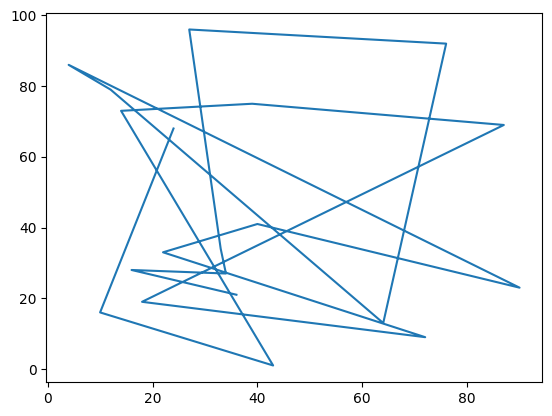

In [ ]:
from matplotlib import pyplot as plt
import random

dado1 = random.sample(range(100), k=20)
dado2 = random.sample(range(100), k=20)

plt.plot(dado1, dado2)

FIGURA COM EIXO COMO VARIÁVEL

Vamos explorar o estilo orientado a objetos, começando pela criação de eixos de forma explícita, ou seja com atribuição a uma variável. Vamos criar uma figura com 1 linha 2 duas colunas, ou seja, teremos dois eixos. Pense nos eixos como uma matriz, na qual cada eixo é uma posição que pode ter uma figura alocada. Vale ressaltar que sobre um eixo (sobre uma figura), podem ser plotados diversos gráficos. Para criar essa estrutura usamos a sintaxe: fig, ax = plt.subplots(1, 2), onde fig e ax são os nomes das variáveis escolhidas. A variável ax, é do tipo array numpy, ou seja, os eixos nada mais são, que uma matriz de contêiners para se criar os plots. Como a figura possui dois eixos, temos que especificar em qual vamos plotar, para isso informamos qual contêiner vamos usar: ax[0] ou ax[1].

Tipo de ax =  <class 'numpy.ndarray'>
Conteúdo de ax[0] =  Axes(0.125,0.11;0.352273x0.77)
Conteúdo de ax[1] =  Axes(0.547727,0.11;0.352273x0.77)


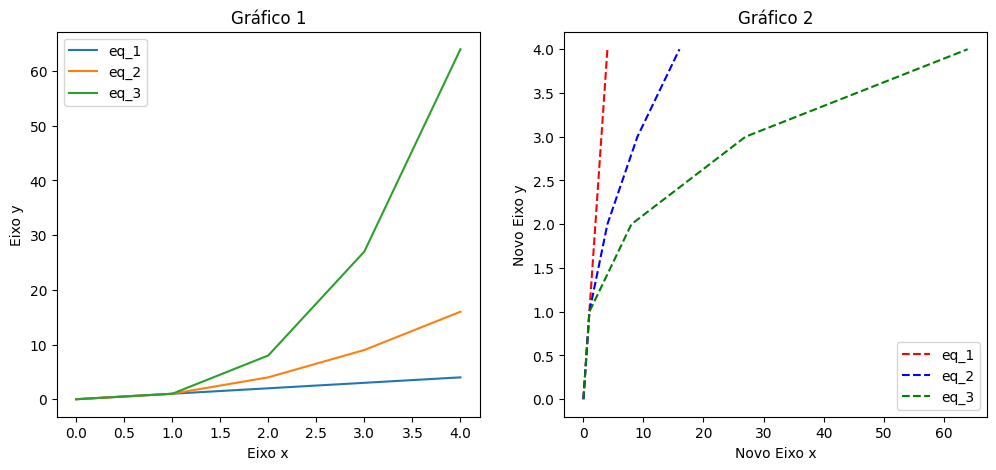

In [ ]:
import numpy as np

x = range(5)
x = np.array(x) # temos que converter para um array numpy, senão o plot não consegue fazer operações.

fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # Cria figura com subplots: 1 linha, 2 colunas e eixos

print("Tipo de ax = ", type(ax))
print("Conteúdo de ax[0] = ", ax[0])
print("Conteúdo de ax[1] = ", ax[1])

ax[0].plot(x, x, label='eq_1') # cria gráfico sobre eixo 0
ax[0].plot(x, x**2, label='eq_2') # cria gráfico sobre eixo 0
ax[0].plot(x, x**3, label='eq_3') # cria gráfico sobre eixo 0
ax[0].set_xlabel('Eixo x')
ax[0].set_ylabel('Eixo y')
ax[0].set_title("Gráfico 1")
ax[0].legend()

ax[1].plot(x, x, 'r--', label='eq_1') # cria gráfico sobre eixo 1
ax[1].plot(x**2, x, 'b--', label='eq_2') # cria gráfico sobre eixo 1
ax[1].plot(x**3, x, 'g--', label='eq_3') # cria gráfico sobre eixo 1
ax[1].set_xlabel('Novo Eixo x')
ax[1].set_ylabel('Novo Eixo y')
ax[1].set_title("Gráfico 2")
ax[1].legend()

FIGURA SEM EIXO COMO VARIÁVEL

Também podemos criar uma figura, sem atribuir o eixo a uma variável. Nesse caso, temos que usar a função plt.subplot(n_rows, n_cols2, plot_number), para definir onde será plotado o gráfico. 

C:\Users\ryanj\AppData\Local\Temp\ipykernel_2256\1502627090.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121) # Adiciona um grid de subplots a figura: 1 linha, 2 colunas - Figura 1


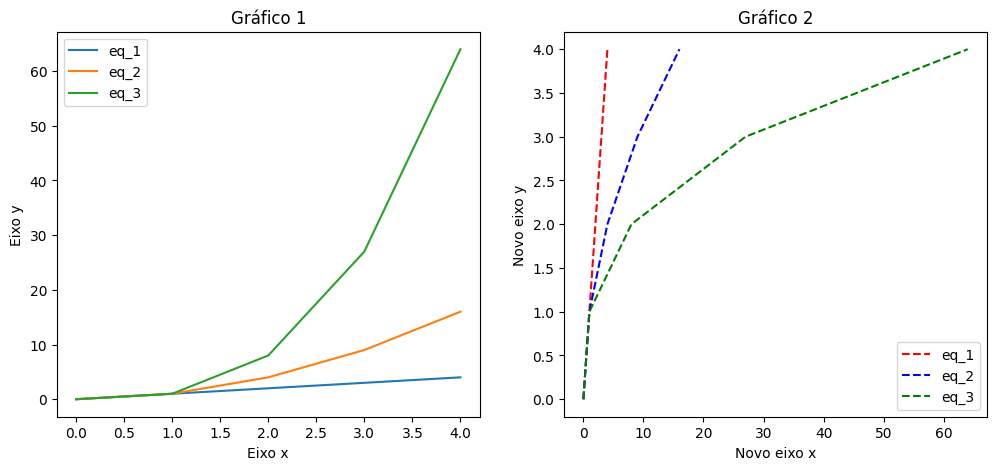

In [ ]:
x = range(5)
x = np.array(x) # temos que converter para um array numpy, senão o plot não consegue fazer operações.

fig = plt.subplots(figsize=(12, 5)) # Cria figura sem eixo
plt.subplot(121) # Adiciona um grid de subplots a figura: 1 linha, 2 colunas - Figura 1           
plt.plot(x, x, label='eq_1')
plt.plot(x, x**2, label='eq_2')
plt.plot(x, x**3, label='eq_3')
plt.title("Gráfico 1")
plt.xlabel('Eixo x')
plt.ylabel('Eixo y')
plt.legend()

plt.subplot(122) # Adiciona um grid de subplots a figura: 1 linha, 2 colunas - Figura 2            
plt.plot(x, x, 'r--', label='eq_1')
plt.plot(x**2, x, 'b--', label='eq_2')
plt.plot(x**3, x, 'g--', label='eq_3')
plt.title("Gráfico 2")
plt.xlabel('Novo eixo x')
plt.ylabel('Novo eixo y')
plt.legend()

BIBLIOTECA PANDAS

As principais estruturas de dados da biblioteca pandas (Series e DataFrame) possuem o método plot(), construído com base no matplotlib e que permite criar gráficos a partir dos dados nas estruturas. Vamos começar criando um DataFrame a partir de um dicionário, com a quantidade de alunos em três turmas distintas.

In [ ]:
import pandas as pd

dados = {
    'turma':['A', 'B', 'C'],
    'qtde_alunos':[33, 50, 45]
    }
df = pd.DataFrame(dados)

df

,turma,qtde_alunos
0,A,33
1,B,50
2,C,45


A partir de um DataFrame, podemos invocar o método: df.plot(*args, **kwargs) para criar os gráficos. Os argumentos dessa função, podem variar, mas existem três que são triviais: os nomes das colunas com os dados para os eixos x e y, bem como o tipo de gráfico (kind). 

<Axes: xlabel='turma'>

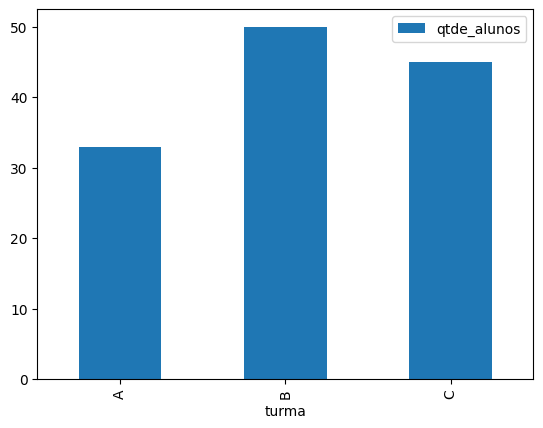

In [ ]:
df.plot(x='turma', y='qtde_alunos', kind='bar')

<Axes: ylabel='turma'>

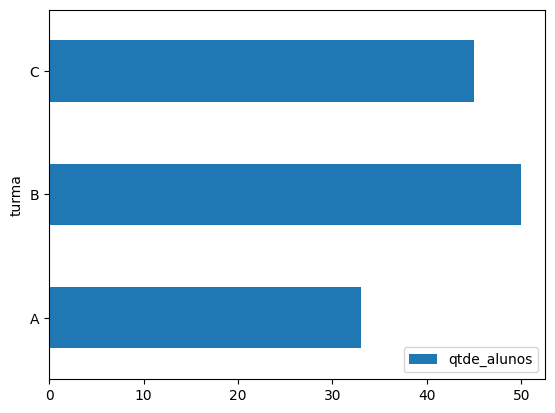

In [ ]:
df.plot(x='turma', y='qtde_alunos', kind='barh')

<Axes: xlabel='turma'>

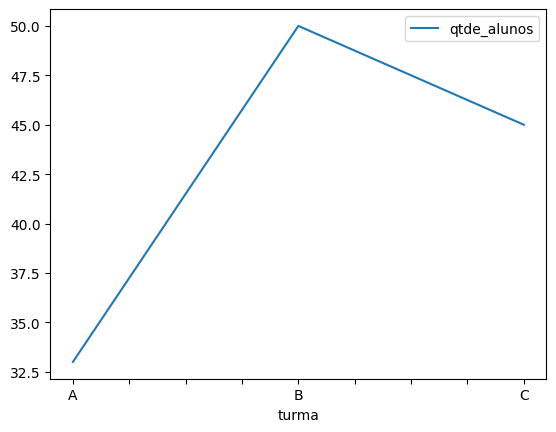

In [ ]:
df.plot(x='turma', y='qtde_alunos', kind='line')

No endereço https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html você pode encontrar a lista com todos os tipos de gráficos possíveis de serem construídos com o método plot() da biblioteca. Para construir um gráfico do tipo pizza (pie), precisamos definir como indíce os dados que serão usados como legenda. 

<Axes: ylabel='qtde_alunos'>

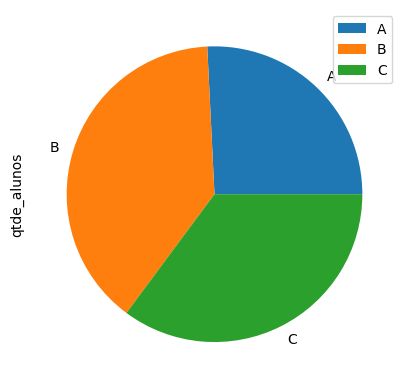

In [ ]:
df.set_index('turma').plot(y='qtde_alunos', kind='pie')

Vale ressaltar que para todos os gráficos criados, a biblioteca oferece uma segunda opção de sintaxe, que é invocar o tipo de gráfico como método, por exemplo:

* df.plot.bar(x='turma', y='qtde_alunos')
* df.plot.line(x='turma', y='qtde_alunos')
* df.set_index('turma').plot.pie(y='qtde_alunos')

BIBLIOTECA SEABORN

Seaborn é outra biblioteca Python, também baseada na matplotlib, que foi desenvolvida especificamente para criação de gráficos. Seaborn pode ser instalado via pip install: pip install seaborn, e para utilizar no projeto existe uma convenção para sintaxe: import seaborn as sns. A biblioteca conta com um repositório de datasets que podem ser usados para explorar as funcionalidades e estão disponíveis no endereço: https://github.com/mwaskom/seaborn-data. 

In [ ]:
import seaborn as sns

# Configurando o visual do gráfico. Leia mais em https://seaborn.pydata.org/generated/seaborn.set.html#seaborn.set
sns.set(style="whitegrid") # opções: darkgrid, whitegrid, dark, white, ticks

df_tips = sns.load_dataset('tips')

print(df_tips.info())
df_tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


FUNÇÃO BARPLOT()

Dentro do grupo de funções para gráficos de variáveis categóricas, temos o barplot(), que permite criar gráficos de barras, mas por que usaríamos essa função e não a da biblioteca pandas? A resposta está nas opções de parâmetros que cada biblioteca suporta. Veja o construtor da função barplot: seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=function mean, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs). Esse construtor possui uma série de parâmetros estatísticos, que dão muita flexibilidade e poder aos cientista de dados, vamos falar sobre o parâmetro "estimator", que por default é a função média. Isso significa que cada barra do gráfico, exibirá a média dos valores de uma determinada coluna, o que pode não fazer sentido, uma vez que queremos exibir a quantidade dos valores (len) ou a soma (sum).

<Axes: xlabel='sex', ylabel='total_bill'>

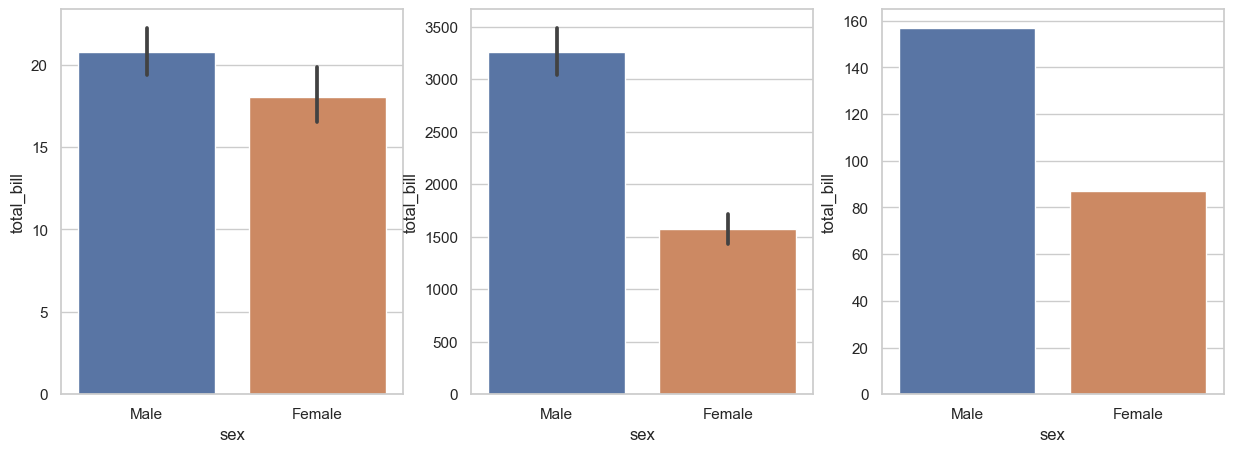

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

sns.barplot(data=df_tips, x='sex', y='total_bill', ax=ax[0])
sns.barplot(data=df_tips, x='sex', y='total_bill', ax=ax[1], estimator=sum)
sns.barplot(data=df_tips, x='sex', y='total_bill', ax=ax[2], estimator=len)

Construir gráficos não é somente plotar imagens bonitas, existem muitos conceitos estatísticos envolvidos e a biblioteca seaborn fornece mecanismos para que essas informações estejam presentes nos resultados visuais.

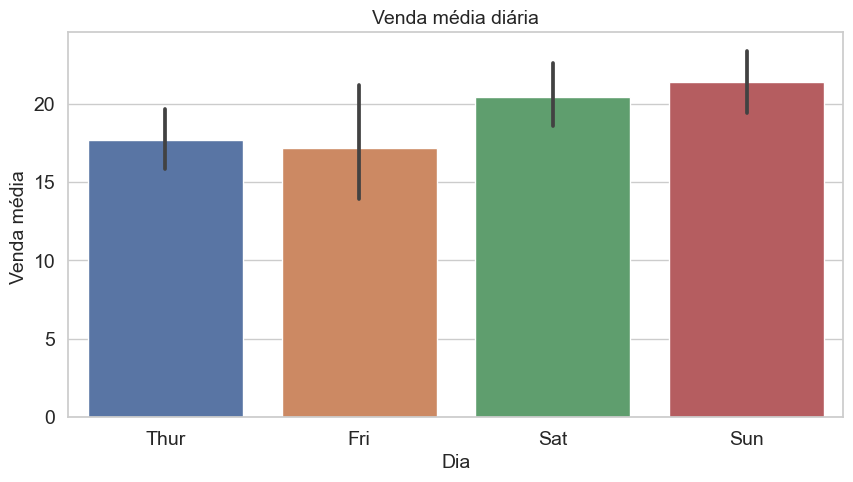

In [ ]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(x="day", y="total_bill", data=df_tips)

ax.axes.set_title("Venda média diária", fontsize=14)
ax.set_xlabel("Dia", fontsize=14)
ax.set_ylabel("Venda média ", fontsize=14)
ax.tick_params(labelsize=14)

FUNÇÃO COUNTPLOT()

Conseguimos plotar a contagem de uma variável categórica, com a função barplot e o estimator len, entretanto, a biblioteca seaborn possui uma função específica para esse tipo de gráfico: seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs).

Esse método não aceita que sejam passados valores de x e y ao mesmo tempo, pois a contagem será feita sobre uma variável categórica, portanto devemos especificar x ou y, a diferença será na orientação do gráfico. Se informamos x, teremos uma gráfico na vertical, se y, na horizontal.

<Axes: xlabel='day', ylabel='count'>

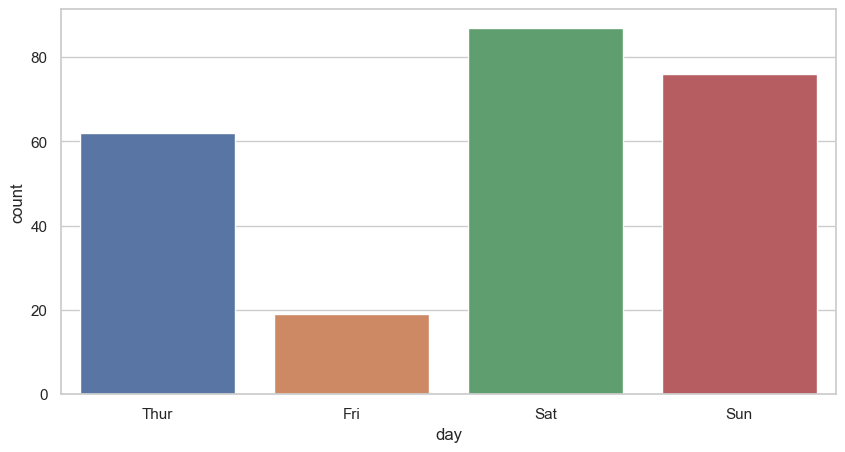

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_tips, x="day")

Vamos plotar mais um gráfico de contagem para mostrar o poder de um único parâmetro. O parâmetro hue é usado como entrada de dados, pois irá discriminar no gráfico a variável atribuída ao parâmetro. Para entendermos, vamos plotar a quantidade de pessoas por dia, mas discriminado por genêro, quantos homens e mulheres estiveram presentes em cada dia? Veja no código a seguir, a única diferença é o parâmetro.

<Axes: xlabel='day', ylabel='count'>

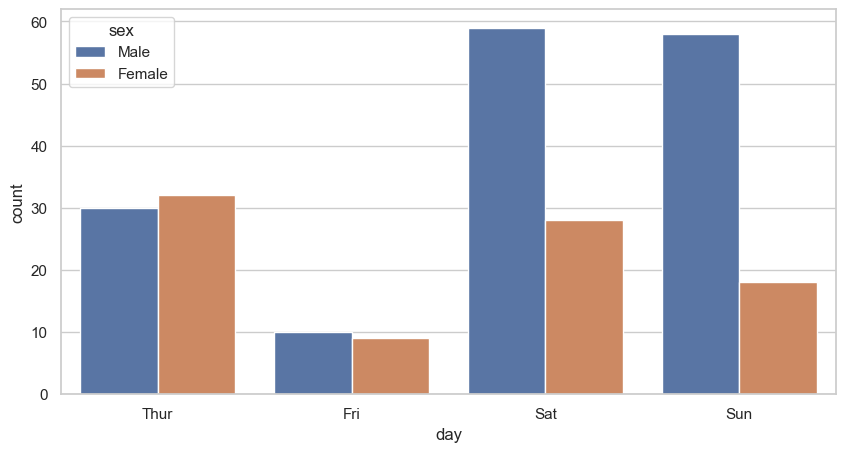

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_tips, x="day", hue="sex")

FUNÇÃO SCARTTERPLOT()

Os gráficos do grupo relacional, permitem avaliar, de forma visual a relação entre duas variáveis: x, y. A função possui a seguinte sintaxe: seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs).

Vamos construir um gráfico que permita avaliar se existe uma relação entre o valor da conta e da gorjeta. Será que quem gastou mais também deu mais gorjeta? Veja o código a seguir, invocamos a função passando o valor da conta como parâmetro para x e a gorjeta para y. Agora vamos avaliar o resultado. Cada "bolinha" representa uma conta paga e uma gorjeta, por exemplo, a bolinha mais a direita, podemos interpretar que para uma conta de aproximadamente 50 e poucos doláres foi dada uma gorjeta de 10. Olhando para o gráfico, parece quanto maior o valor da conta, maior foi o valor da gorjeta. Esse comportamento é chamado de relação linear, pois conseguimos traçar uma reta entre os pontos, descrevendo seu comportamento através de uma função linear.

<Axes: xlabel='total_bill', ylabel='tip'>

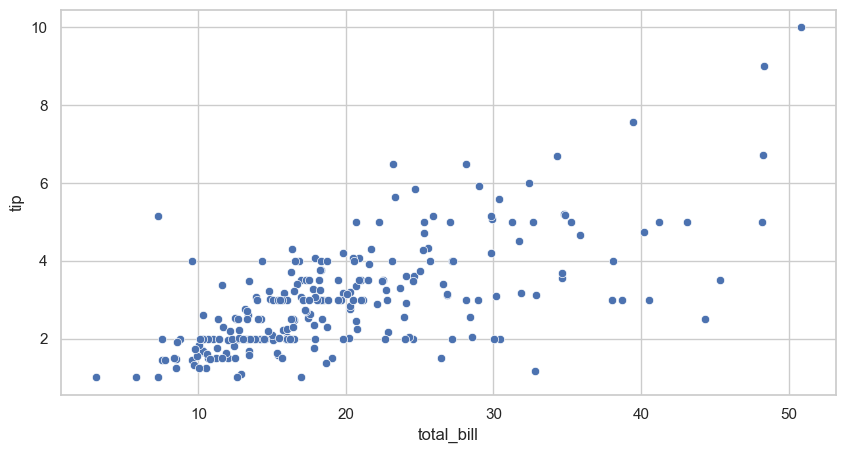

In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_tips, x="total_bill", y="tip")

### Desafio

Como desenvolvedor em uma empresa de consultoria de software, você foi alocado em um projeto para uma empresa de telecomunicações. Essa empresa tem interesse em habilitar um novo serviço, mas antes precisa entender qual a disponibilidade dos satélites autorizados a operar no Brasil. Para a primeira sprint (período de 15 dias de trabalho), você foi encarregado de apresentar, uma análise preliminar da situação dos satélites.

Nessa primeira entrega, você deve apresentar a comparação da quantidade de satélites que são brasileiros, dos que são estrangeiros. Dentre os satélites brasileiros, você deve discriminar a quantidade de cada operadora comercial, bem como a quantidade de satélites operando em cada banda. As mesmas análises devem ser feitas para os satélites que pertencem a outros países.

Onde esses dados podem ser encontrados? Qual a melhor forma de apresentar os resultados, basta levar os números? Qual biblioteca pode ser usada para resolver o desafio?

Um dos grandes desafios nessa primeira entrega é encontrar uma fonte confiável de dados.
No endereço https://www.dados.gov.br/dataset, existe uma categoria específica para esse tipo de informação: Agência Nacional de Telecomunicações - Anatel. Dentro dessa categoria encontramos um arquivo delimitado (csv) com a relação de satélites autorizados a operar no Brasil: https://www.dados.gov.br/dataset/relacao-de-satelites-geoestacionarios-autorizados-a-operar-no-brasil, basta clicar no recurso e fazer download para a pasta do projeto.

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df_satelites = pd.read_csv('./satelites/satelites_operando_comercialmente.csv', sep=';', encoding='utf-8')
df_satelites.drop_duplicates(inplace=True)
df_satelites.reset_index(drop=True ,inplace=True)

print(df_satelites.info())
df_satelites.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Satélite em operação     60 non-null     object
 1   Posição orbital          60 non-null     object
 2   Bandas do satélite       60 non-null     object
 3   Tipo de Direito          60 non-null     object
 4   Operadora comercial      60 non-null     object
 5   Posição Orbital Decimal  60 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB
None


,Satélite em operação,Posição orbital,Bandas do satélite,Tipo de Direito,Operadora comercial,Posição Orbital Decimal
0,ANIK G1,"107,3ºO","C (não planejada),Ku (não planejada),X",Estrangeiro,TELESAT CANADA,"-107,3"
1,INMARSAT-4 F3,98ºO,L,Estrangeiro,INMARSAT SOLUTIONS B.V.,-98
2,INMARSAT-4 F3,98ºO,L,Estrangeiro,INMARSAT SOLUTIONS (CANADA) INC.,-98
3,INMARSAT-4 F3,98ºO,L,Estrangeiro,TELECOM ITÁLIA S.p.A.,-98
4,INMARSAT-4 F3,98ºO,L,Estrangeiro,"COMSAT, INC",-98
5,INMARSAT-4 F3,98ºO,L,Estrangeiro,MORSVIAZSPUTNIK,-98
6,INMARSAT-4 F3,98ºO,L,Estrangeiro,MARLINK SAS,-98
7,IS-30,95ºO,Ku (não planejada),Estrangeiro,INTELSAT LICENSE LLC,-95
8,GALAXY 28,89ºO,"C (não planejada),Ku (não planejada)",Estrangeiro,INTELSAT LICENSE LLC,-89
9,STARONE D1,84ºO,"C (não planejada),Ku (não planejada),Ka",Brasileiro,EMBRATEL TVSAT TELECOMUNICAÇÕES S.A.,-84


Satelites Brasileiros x Estrangeiros

<Axes: xlabel='Tipo de Direito', ylabel='count'>

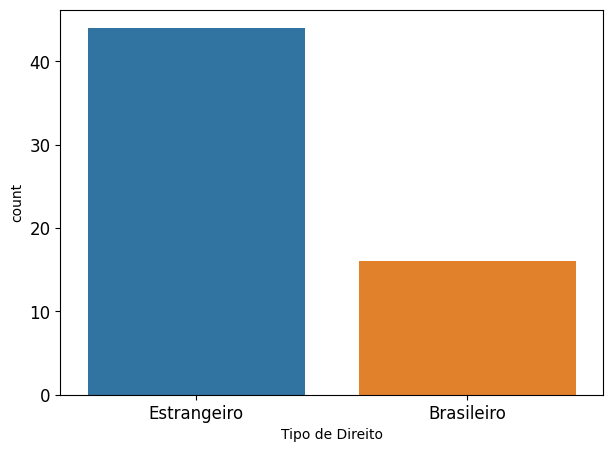

In [48]:
plt.figure(figsize=(7, 5))
plt.tick_params(labelsize=12)
sns.countplot(data=df_satelites, x='Tipo de Direito')

Extraindo dados sobre satelites brasileiros

<Axes: xlabel='Operadora comercial', ylabel='count'>

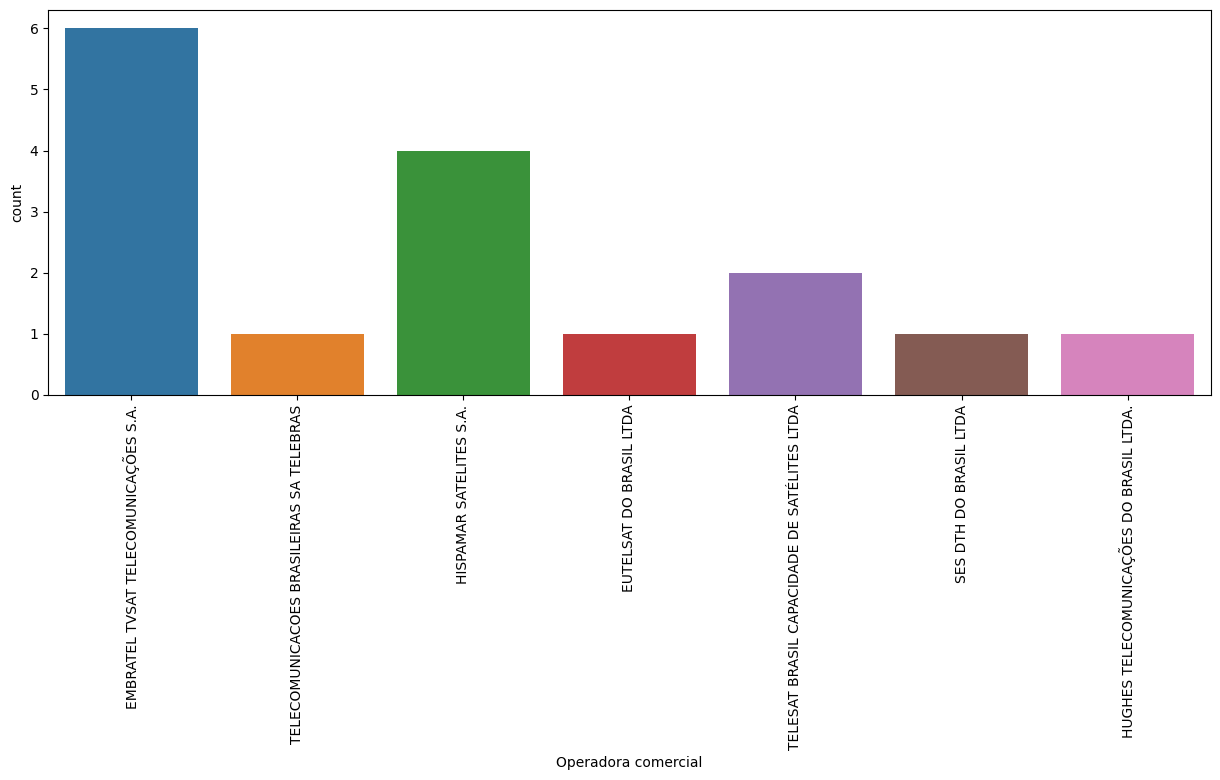

In [57]:
df_satelites_brasileiros = df_satelites.loc[df_satelites['Tipo de Direito'] == 'Brasileiro']

df_satelites_brasileiros

plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
sns.countplot(data=df_satelites_brasileiros, x='Operadora comercial')

Satelites em cada banda

<Axes: xlabel='Bandas do satélite', ylabel='count'>

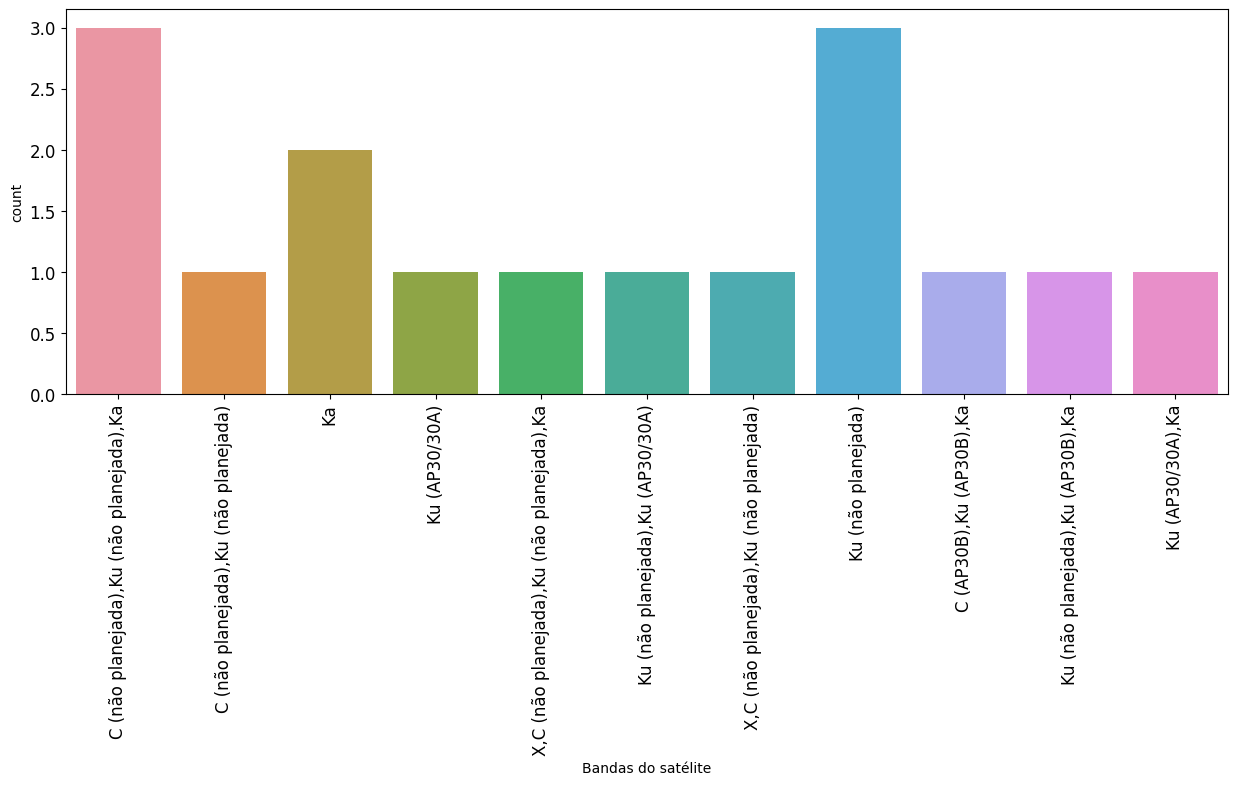

In [59]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)
sns.countplot(data=df_satelites_brasileiros, x='Bandas do satélite')

In [61]:
df_satelites_estrangeiros = df_satelites.loc[df_satelites['Tipo de Direito'] == 'Estrangeiro']
print(df_satelites_estrangeiros)
df_satelites_estrangeiros.head(10)

   Satélite em operação Posição orbital  \
0               ANIK G1         107,3ºO   
1         INMARSAT-4 F3            98ºO   
2         INMARSAT-4 F3            98ºO   
3         INMARSAT-4 F3            98ºO   
4         INMARSAT-4 F3            98ºO   
5         INMARSAT-4 F3            98ºO   
6         INMARSAT-4 F3            98ºO   
7                 IS-30            95ºO   
8             GALAXY 28            89ºO   
15               SES-17            67ºO   
16               SES-10            67ºO   
24           AMAZONAS 2            61ºO   
26                IS-21            58ºO   
27                IS-34          55,5ºO   
28        Global Xpress            55ºO   
29  Inmarsat-3 AOR West            54ºO   
30  Inmarsat-3 AOR West            54ºO   
31  Inmarsat-3 AOR West            54ºO   
33                IS-14            45ºO   
34               SKY-B1          43,1ºO   
35                IS 11            43ºO   
36                SES-6          40,5ºO   
37       HI

,Satélite em operação,Posição orbital,Bandas do satélite,Tipo de Direito,Operadora comercial,Posição Orbital Decimal
0,ANIK G1,"107,3ºO","C (não planejada),Ku (não planejada),X",Estrangeiro,TELESAT CANADA,"-107,3"
1,INMARSAT-4 F3,98ºO,L,Estrangeiro,INMARSAT SOLUTIONS B.V.,-98
2,INMARSAT-4 F3,98ºO,L,Estrangeiro,INMARSAT SOLUTIONS (CANADA) INC.,-98
3,INMARSAT-4 F3,98ºO,L,Estrangeiro,TELECOM ITÁLIA S.p.A.,-98
4,INMARSAT-4 F3,98ºO,L,Estrangeiro,"COMSAT, INC",-98
5,INMARSAT-4 F3,98ºO,L,Estrangeiro,MORSVIAZSPUTNIK,-98
6,INMARSAT-4 F3,98ºO,L,Estrangeiro,MARLINK SAS,-98
7,IS-30,95ºO,Ku (não planejada),Estrangeiro,INTELSAT LICENSE LLC,-95
8,GALAXY 28,89ºO,"C (não planejada),Ku (não planejada)",Estrangeiro,INTELSAT LICENSE LLC,-89
15,SES-17,67ºO,Ka,Estrangeiro,SES ASTRA S.A.,-67


<Axes: xlabel='Operadora comercial', ylabel='count'>

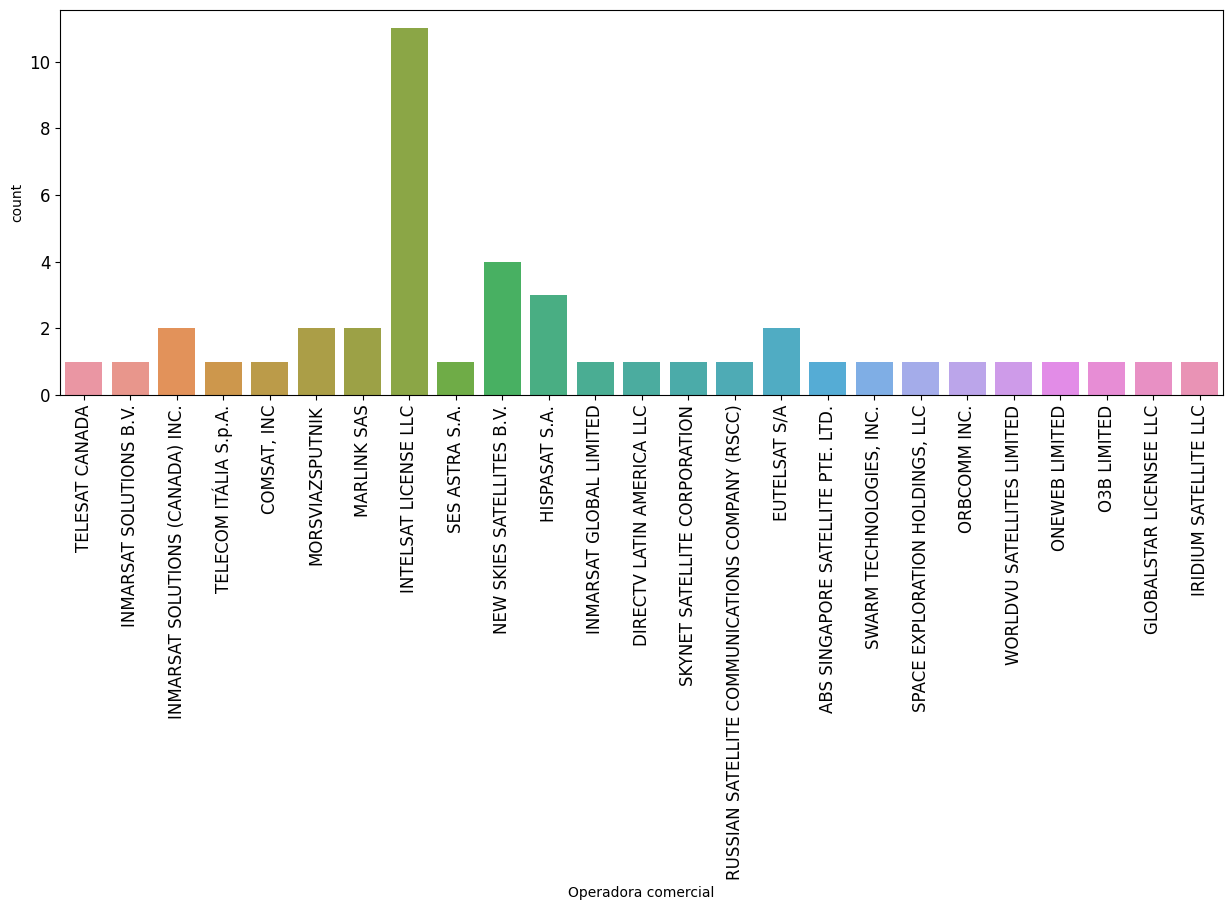

In [62]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)
sns.countplot(data=df_satelites_estrangeiros, x='Operadora comercial')

Satelites estrangeiros por banda

<Axes: xlabel='Bandas do satélite', ylabel='count'>

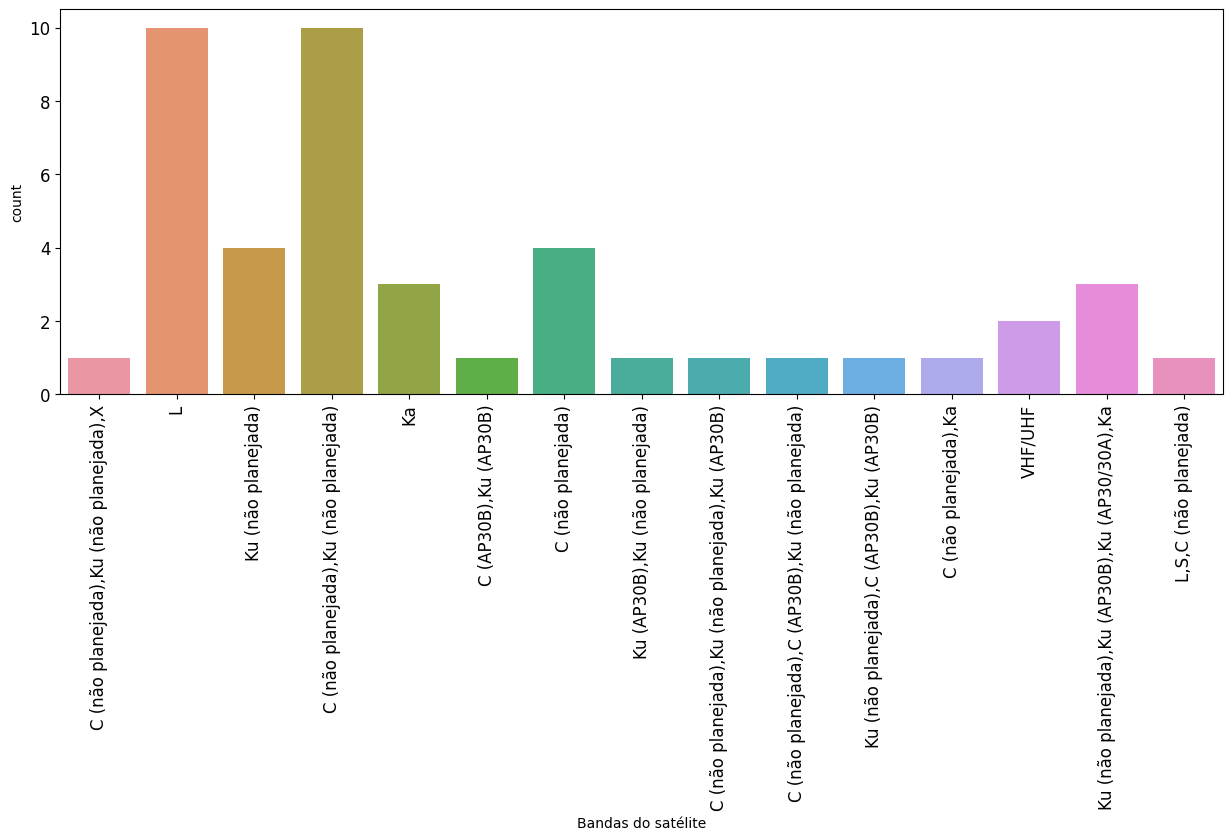

In [65]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)
sns.countplot(data=df_satelites_estrangeiros, x='Bandas do satélite')